# Describing Data

### What do you find in this notebook?

In this exercise, first, you will familiarize yourself with the Python libraries 'statsmodels' and 'SciPy' that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables, and perform hypothesis testing. Then, second, you will work on a set of exercises that will let you practice your skills.

Here we show a couple of examples of how to do common analyses, but there are many more useful probability distributions and statistical tests. In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook:
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html), [more complete documentation](https://www.statsmodels.org/stable/stats.html)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

# Tutorial: How to use the libraries

- You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Here we load it. Take some time to familiarize yourself with the contents. One row represents one county.
- Census data refers to the systematic collection and recording of information about the members of a given population. This typically involves a wide array of demographic, social, and economic information.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [2]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [3]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [4]:
df.sample(10)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
383,12127,Florida,Volusia,503719,245481,258238,12.1,73.9,10.3,0.3,...,1.3,2.9,5.0,25.3,199287,81.8,12.1,5.9,0.2,9.1
776,18159,Indiana,Tipton,15573,7776,7797,2.6,95.7,0.2,0.0,...,1.1,1.7,3.1,24.1,7195,82.1,12.1,5.5,0.2,6.2
1876,36097,New York,Schuyler,18410,9262,9148,1.7,95.4,0.9,0.2,...,3.9,1.3,3.5,25.6,8125,74.7,15.3,9.9,0.1,6.4
2823,51007,Virginia,Amelia,12777,6492,6285,1.0,72.3,24.3,0.4,...,1.1,1.9,2.8,33.8,5686,77.2,14.9,7.9,0.0,5.0
2228,41041,Oregon,Lincoln,46347,22551,23796,8.4,83.3,0.3,3.0,...,4.8,1.4,6.2,19.1,19454,72.3,16.2,11.3,0.2,7.9
2944,51760,Virginia,Richmond city,213735,101702,112033,6.4,39.9,48.4,0.1,...,5.1,3.6,4.2,21.9,104547,79.6,16.2,4.0,0.1,10.0
2148,40035,Oklahoma,Craig,14744,7545,7199,3.1,64.7,3.1,18.5,...,1.7,2.4,3.6,21.3,5781,67.7,21.6,10.2,0.5,6.4
1000,21015,Kentucky,Boone,124617,61530,63087,3.9,88.8,2.9,0.2,...,1.0,1.1,3.8,24.1,62624,85.2,11.3,3.5,0.1,5.6
984,20193,Kansas,Thomas,7925,3900,4025,5.4,91.5,1.8,0.3,...,3.9,1.1,5.6,10.1,4376,69.9,18.5,11.4,0.1,2.7
1686,31065,Nebraska,Furnas,4887,2376,2511,3.3,94.8,0.1,0.5,...,4.1,1.5,9.0,14.5,2323,67.6,16.7,15.1,0.6,3.4


This command is used to randomly select a sample of rows from a DataFrame `df`. The `replace` parameter (whether or not to allow sampling of the same row more than once) is set to `False` by default.

- We will focus first on income per capita across counties.

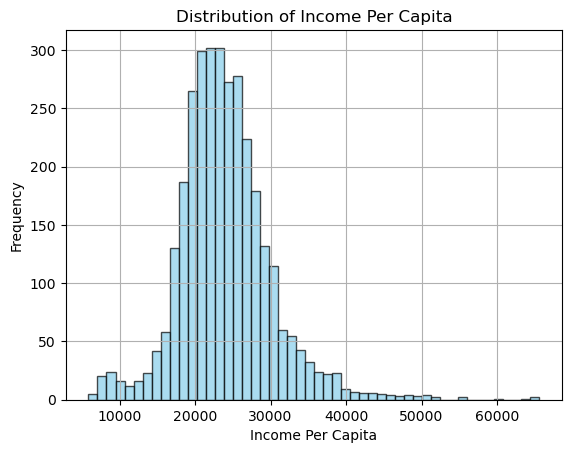

In [5]:
df['IncomePerCap'].hist(bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# You can combine using Pandas' integrated visualization functions with plt to add customization.
plt.xlabel('Income Per Capita')
plt.ylabel('Frequency')
plt.title('Distribution of Income Per Capita');

### 1. Calculating descriptive statisctics

- Let's calculate basic descriptive statistics of the income per capita.

In [6]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

- What distribution does the data come from? Here is how we can test the goodness of the fit.

In [7]:
# does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(0.0637621121184162, 0.0009999999999998899)

- Kolmogorov-Smirnov (K-S) test. The K-S test is a non-parametric test used to determine if a sample comes from a specific probability distribution, in this case, a normal distribution.
- `.values`: This part converts the selected column into a numpy array. It’s passing the values in the 'IncomePerCap' column to the function as an array.
- The function will return a test statistic and a p-value. The test statistic is a measure of the discrepancy between the observed and expected cumulative distributions. The p-value indicates the probability of observing the given data if it actually comes from a normal distribution

#### Test Statistic (D):
The K-S test statistic, D, quantifies the maximum distance between the empirical cumulative distribution function (ECDF) of the sample data and the cumulative distribution function (CDF) of the reference distribution, which is the normal distribution in this case. D measures the greatest vertical distance between the ECDF and CDF, meaning it identifies the point where the two distributions differ the most. A larger value of D implies a larger discrepancy between the two distributions, suggesting that the sample data may not follow the reference distribution.

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [8]:
#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.433243770582646, 0.0009999999999998899)

- p < 0.05 -> not exponential either!

### 2. How to sample the data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [9]:
#make 10 samples with replacement
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be acieved with weights parameter
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

Sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic and downsample the others. This can be acieved with weights parameter : here we sample by upsampling counties with large population.

The `weights` parameter is crucial here. It specifies that the probability of each row (county) being included in the sample is proportional to the value in the `'TotalPop'` column.
In other words, counties with larger populations will have a higher chance of being selected in the sample.

In [10]:
#on avergage, the samples in the sample produced with reweighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

42511.8
862726.4


### 3. Examining relationship between two variables

- Is income per capita of a county correlated with the unemployment?

In [11]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

PearsonRResult(statistic=0.2646136320394489, pvalue=9.942215354239015e-53)

This Calculates the Pearson correlation coefficient and the p-value for testing non-correlation. 
- Output : 
1. Pearson correlation coefficient (r): Measures the linear relationship between two datasets. The value ranges from -1 to 1, where:
    - 1 indicates a perfect positive linear relationship
    - -1 indicates a perfect negative linear relationship
    - 0 indicates no linear relationship
2. P-value: Tests the null hypothesis that the true correlation coefficient is zero (no correlation). A low p-value indicates that you can reject the null hypothesis of no correlation.
- Interpretation : 
1. Pearson correlation coefficient (r):
    - If r is closer to 1, it suggests a strong positive linear relationship between income per capita and the number of employed individuals.
    - If r is closer to -1, it indicates a strong negative linear relationship.
2. P-value:
    - A low p-value (typically <0.05) suggests that the observed correlation is statistically significant, and it’s unlikely to observe such a relationship by random chance.
    - A high p-value suggests that the correlation is not statistically significant.

- There is a small (0.26), but significant (p < 0.05) positive correlation.

In [12]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

Calculates the Spearman rank-order correlation coefficient between two variables. The Spearman correlation assesses how well the relationship between two variables can be described using a monotonic function. The Spearman correlation coefficient is based on the ranked values of the data rather than the raw data. It is a non-parametric test and does not assume a linear relationship or normally distributed data.

- Spearman rank coorrelation is also significant.

### 4. Hypothesis testing

- Is income per capita higher in New York counties compared to California counties?

In [13]:
df.loc[df['State'] == 'New York']['IncomePerCap'].mean()

28189.75806451613

In [14]:
df.loc[df['State'] == 'California']['IncomePerCap'].mean()

27902.603448275862

- We see that there is a ~300$ gap. Quite a lot!
- But is it significantly higher? Let's use a t-test. This is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values. 

In [15]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

TtestResult(statistic=0.19788117232375713, pvalue=0.8434785239169611, df=118.0)

- Output : 
    1. t-statistic: Represents the calculated difference in sample means in units of standard error. A larger absolute value of the t-statistic indicates a larger difference between the two sample means relative to the variability within the samples.
    2. p-value: Indicates the probability of observing the data assuming the null hypothesis (equal means) is true. A smaller p-value (commonly < 0.05) allows you to reject the null hypothesis, indicating a statistically significant difference in income per capita between New York and California.

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### 5. How to measure uncertainty
- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

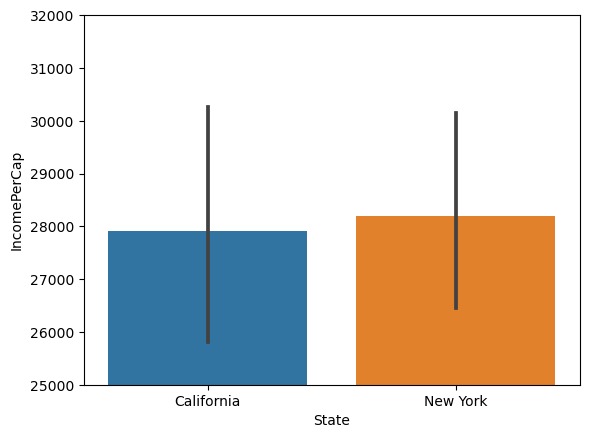

In [16]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000]);

# Exercise 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [17]:
len(df.index.unique())

3220

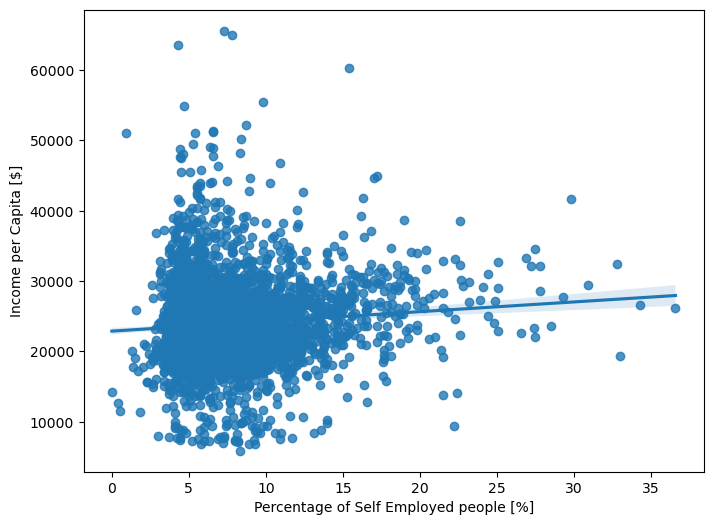

In [18]:
plt.figure(figsize=(8,6))
sns.regplot(data = df, x='SelfEmployed',y='IncomePerCap')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]");

In [41]:
stats.pearsonr(df['IncomePerCap'],df['SelfEmployed'])

PearsonRResult(statistic=0.08727386609551786, pvalue=7.052861196524553e-07)

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

In [20]:
df_set_a = df.query("State == 'Wisconsin' | \
                     State == 'Tennessee' | \
                     State == 'Minnesota' ") 

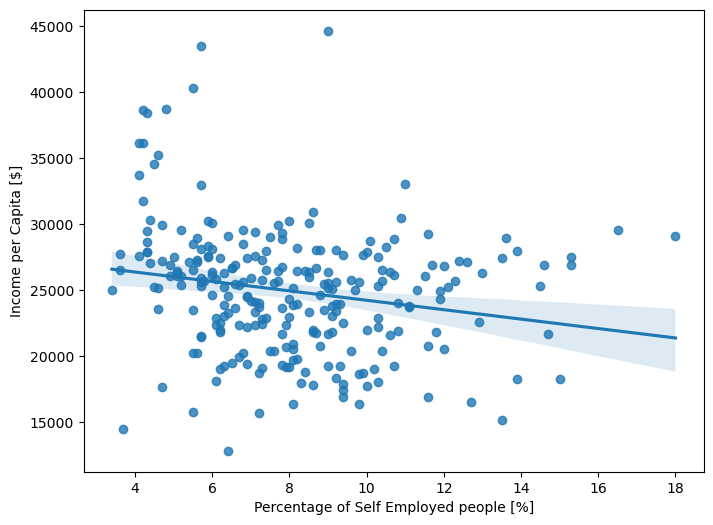

In [21]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_set_a, x='SelfEmployed', y='IncomePerCap')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]");

In [42]:
stats.pearsonr(df_set_a['IncomePerCap'],df_set_a['SelfEmployed'])

PearsonRResult(statistic=-0.20229350736521495, pvalue=0.0011881639322138644)

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

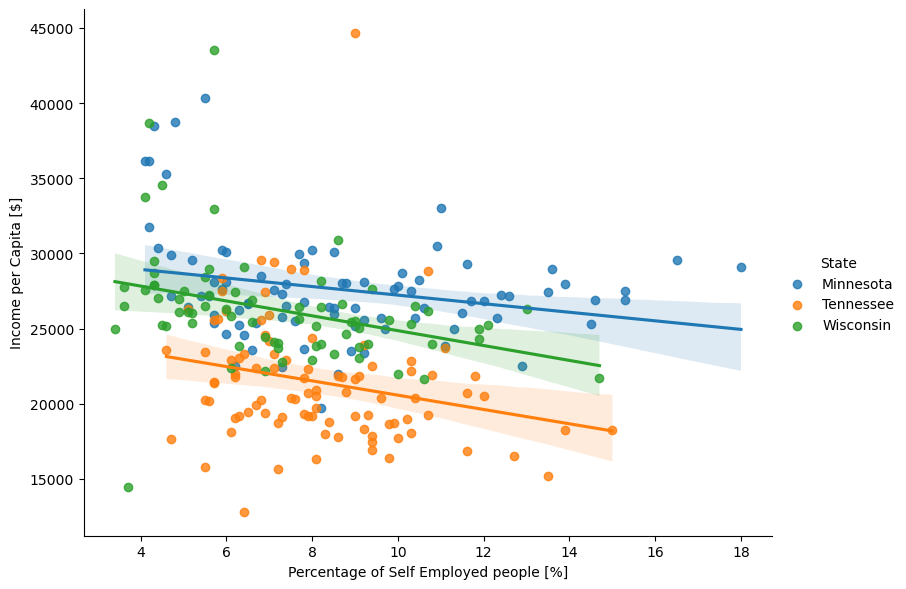

In [27]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

sns.lmplot(data=df_set_a, x='SelfEmployed', y='IncomePerCap', hue = 'State',height=6, aspect=8/6)
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]");

In [49]:
print(stats.pearsonr(df_set_a[df_set_a['State'] == 'Wisconsin']['IncomePerCap'],df_set_a[df_set_a['State'] == 'Wisconsin']['SelfEmployed']))
print(stats.pearsonr(df_set_a[df_set_a['State'] == 'Tennessee']['IncomePerCap'],df_set_a[df['State'] == 'Tennessee']['SelfEmployed']))
print(stats.pearsonr(df_set_a[df_set_a['State'] == 'Minnesota']['IncomePerCap'],df_set_a[df_set_a['State'] == 'Minnesota']['SelfEmployed']))

PearsonRResult(statistic=-0.32905300016378525, pvalue=0.004768134887745218)
PearsonRResult(statistic=-0.2383604868491315, pvalue=0.020011631955528172)
PearsonRResult(statistic=-0.2538551921654062, pvalue=0.01766519930091188)


**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

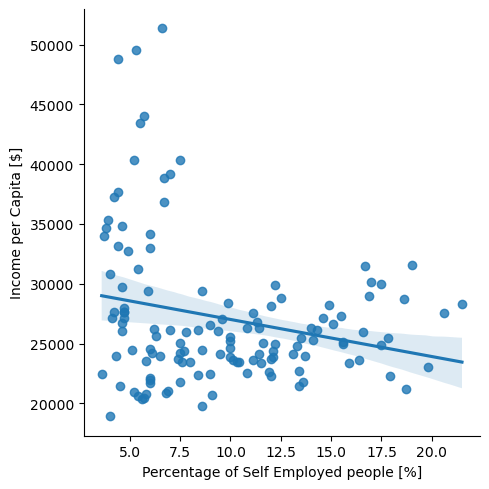

In [37]:
df_set_b = df.query("State == 'New Jersey' | State == 'Kansas' | State == 'Rhode Island'")
sns.lmplot(data=df_set_b, x='SelfEmployed', y='IncomePerCap')
plt.xlabel('Percentage of Self Employed people [%]')
plt.ylabel('Income per Capita [$]');

In [46]:
stats.pearsonr(df_set_b['IncomePerCap'], df_set_b['SelfEmployed'])

PearsonRResult(statistic=-0.2322214134608569, pvalue=0.0076074930428573165)

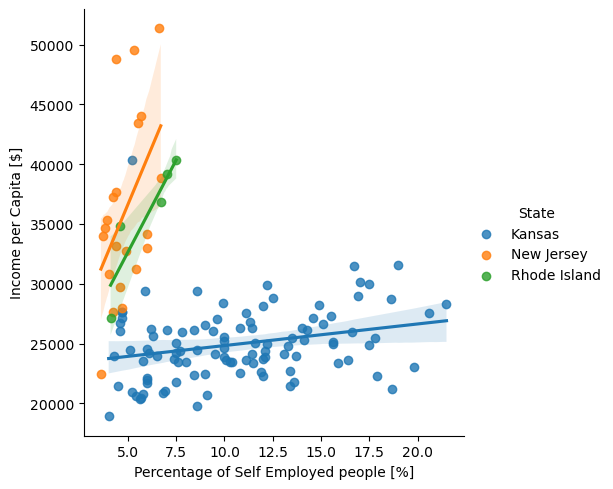

In [38]:
df_set_b = df.query("State == 'New Jersey' | State == 'Kansas' | State == 'Rhode Island'")
sns.lmplot(data=df_set_b, x='SelfEmployed', y='IncomePerCap', hue='State')
plt.xlabel('Percentage of Self Employed people [%]')
plt.ylabel('Income per Capita [$]');

In [56]:
print(stats.pearsonr(df_set_b[df_set_b['State'] == 'Kansas']['IncomePerCap'], df_set_b[df_set_b['State'] == 'Kansas']['SelfEmployed']))
print(stats.pearsonr(df_set_b[df_set_b['State'] == 'New Jersey']['IncomePerCap'], df_set_b[df_set_b['State'] == 'New Jersey']['SelfEmployed']))
print(stats.pearsonr(df_set_b[df_set_b['State'] == 'Rhode Island']['IncomePerCap'], df_set_b[df_set_b['State'] == 'Rhode Island']['SelfEmployed']))

PearsonRResult(statistic=0.2581029971443692, pvalue=0.007853351846832411)
PearsonRResult(statistic=0.4804478471336281, pvalue=0.027488944757806295)
PearsonRResult(statistic=0.9021788382149803, pvalue=0.0361831020157593)


Answer : I would recommend incentivizing self-employment in the set B since every states within it show a positive correlation between self-employment rate and income per capita

# Exercise 2. Data visualization and read the stats comprehension and interpretation questions.

- As part of the quizes, two homeworks and the final exam, you will be at times asked to interpret your result based on the understanding of underlying concepts. The questions below can help you practice and get a sense of how well you understand the concepts covered in the class so far. Can you answer these questions confidently?

### Question 1. The yearly salaries (in thousands of CHF) of 7000 people are summarized in the following box plot. If the 20th percentile of the salaries is 110,000, how many people earn between 110,000 and 114,000?

- a) 2100
- b) 700
- c) 350
- d) 70

<img src="boxplot.png" style="width: 400px;" align="left"/>

In [57]:
(25-20)/100 * 7000

350.0

### Question 2. What visualizations are suitable for getting insights about the distribution of a single continuous variable?

- a) Barplot and histogram
- **b) Boxplot and histogram**
- c) Scatterplot and boxplot
- d) Barplot, boxplot, and histogram

### Question 3. In a new groundbreaking study, 28 out of 100 patients reported improvements after taking a new medicine. It is known that, when given a placebo, 20% of the patients report feeling better. What is the p-value assuming the null hypothesis that the probability of successful treatment in this groundbreaking study is the same as the probability of reporting feeling better under placebo, according to a one-sided binomial test? Hint: you may use the statsmodels.stats.proportion.binom_test function.

- a) 0.00034
- b) 0.0034
- **c) 0.034**
- d) 0.34

The null hypothesis for this test is that the new medicine has the same effect as the placebo, with a success probability of p=0.20 (20%). We are conducting a one-sided test to see if the new medicine has a higher success rate than the placebo.

$H_0 : p = p_0$\
$H_1 : p > p_0$

`statsmodels.stats.proportion.binom_test(count, nobs, prop, alternative)`:
- `count` is the number of successes
- `nobs` is the number of trials
- `prop` is the probability of success under the null hypothesis
- `alternative` specifies the alternative hypothesis ('two-sided', 'smaller', or 'larger')

In [78]:
import statsmodels.stats.proportion as proportion

# Number of successes 
x = 28

# Number of trials
n = 100

# Null hypothesis success probability
p_0 = 0.2

p_value = proportion.binom_test(x, n, p_0, alternative='larger')
round(p_value, 3)

0.034

### Question 4. The 95% confidence interval of the average height of 1000 people using bootstrap resampling with 10000 bootstrap samples is calculated by:

- a) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.
- b) Sampling 10000 height values without replacement and computing the mean. This is repeated 1000 times to create a sorted list of the 1000 means. The CI is defined by the 25th and the 975th value in sorted order.
- **c) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.**
- d) Sampling 1000 height values without replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.

Bootstrap is a powerful resampling method used in statistical inference to estimate the distribution of a sample statistic. The bootstrap method allows you to assess the variability and uncertainty of your sample estimates, such as the mean, median, variance, and other statistical parameters, by resampling your data.

### Implement your bootstrapping function that you will use in the rest of the course. It should take an array and the number of iterations as inputs, and output 95% confidence intervals of the mean.

In [79]:
def bootstrap_CI(data, num_iterations=10000):
    """
    Calculate the 95% confidence interval of the mean using bootstrapping.
    
    Parameters:
    - data: array-like, data to bootstrap
    - num_iterations: int, number of bootstrap iterations
    
    Returns:
    - ci_lower: float, lower bound of the confidence interval
    - ci_upper: float, upper bound of the confidence interval
    """
    means = []
    for _ in range(num_iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(bootstrap_sample))
    
    ci_lower = np.percentile(means, 2.5)
    ci_upper = np.percentile(means, 97.5)
    
    return ci_lower, ci_upper

### Bootstrapping  :
Bootstrapping is not just about calculating the mean of your sample; it's about estimating the uncertainty or variability associated with that sample mean. In simpler terms, bootstrapping helps you answer the question: "If I were to collect another sample, how much would my sample mean vary?"

#### Why Bootstrapping is interesting: 
1. **Estimating Variability**: When you collect a sample and calculate a statistic (like the mean), you get a single value. However, this value is a point estimate and doesn't give you a sense of the variability or uncertainty associated with the estimate. Bootstrapping allows you to understand this variability by simulating the process of obtaining multiple samples.
2. **Working with Small Samples**: In cases where your sample size is small, the uncertainty around your point estimate is high. Bootstrapping, by resampling with replacement, allows you to "create" multiple samples, helping estimate the variability of the sample statistic.
3. **Non-Parametric Approach**: Bootstrapping is a non-parametric method, meaning it doesn’t rely on underlying population distributions. This is especially useful when the underlying distribution is unknown or not normal, making it difficult to apply traditional statistical methods.
4. **Complex Estimates**: For more complex statistics or models where theoretical calculations of variability (like standard errors) are challenging or impossible to derive, bootstrapping offers a straightforward way to estimate this variability empirically.

### Question 5. A study conducted at EPFL revealed a negative Spearman’s correlation between GPA and entry-level job salary. Which of the following statements is true?

- **a) There could be a positive Spearman’s correlation between GPA and entry-level job salary in every single department of EPFL.**
- b) Spearman correlation between GPA and entry-level job salary in every single department has to be positive.
- c) Across all levels, as opposed to entry-level only, higher GPA scores are associated with higher job salaries.
- d) We can infer that finishing EPFL with a higher GPA causes you to have a lower entry-level job salary.

### Question 6. The average number of requests per page during a day on a large website is 200, while the median is 15. 

- a) You can assume that the distribution is heavy-tailed.
- b) You are dealing with a left-skewed distribution.
- c) Half of the pages get more than 200 requests.
- **d) None of the above.**

The data is not necessarily heavy-tailed nor skewed, a signle outlier could shift the average.